In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link_to_dataset = 'https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/abalone.csv'

In [3]:
df  = pd.read_csv(link_to_dataset)

# eda_abalone

## Описание данных

* `Sex` - пол особи, мужская/женская/младенец
* `Length` - наибольшаяя длина раковины, мм
* `Diameter` - диаметр раковины, измеряемый перпендикулярно длине, мм
* `Height` - высота абалона вместе с мясом в раковине, мм
* `Whole weight` - масса целого абалона (включая раковину и внутренности), г
* `Shucked weight` - масса только мяса после извлечения из раковины, г
* `Viscera weight` - масса внутренностей (включая кишечник) после удаления крови, г
* `Shell weight` - масса раковины после высушивания, г
* `Rings` - количество колец на раковине. Чтобы определить возраст абалона в годах, к числу колец добавляют 1.5 (целевой признак)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Исследование данных

In [5]:
print(f"Размер таблицы: {df.shape}")

Размер таблицы: (4177, 9)


Информация о типах данных и пропусках

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Наличие пропусков в столбцах Diameter, Whole weight, и Shell weight требует их обработки перед построением модели.

Основные числовые характеристики

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


По числовым характеристикам становятся заметны аномальные значения высоты аболона (минимальная высота равна 0) и 4 каатегории в категориальном признаке вместо трех.

In [9]:
df.duplicated().sum()

0

Дубликаты не обнаружены

## Работа с пропущенными значениями

In [10]:
df.isnull().mean() * 100

,0
Sex,0.000000
Length,0.000000
Diameter,2.370122
Height,0.000000
Whole weight,2.370122
Shucked weight,0.000000
Viscera weight,0.000000
Shell weight,1.197031
Rings,0.000000


Пропущенные значения составляют небольшой процент от пропущенных данных, поэтому, чтобы избежать влияние выбросов, заменим их медианным значением

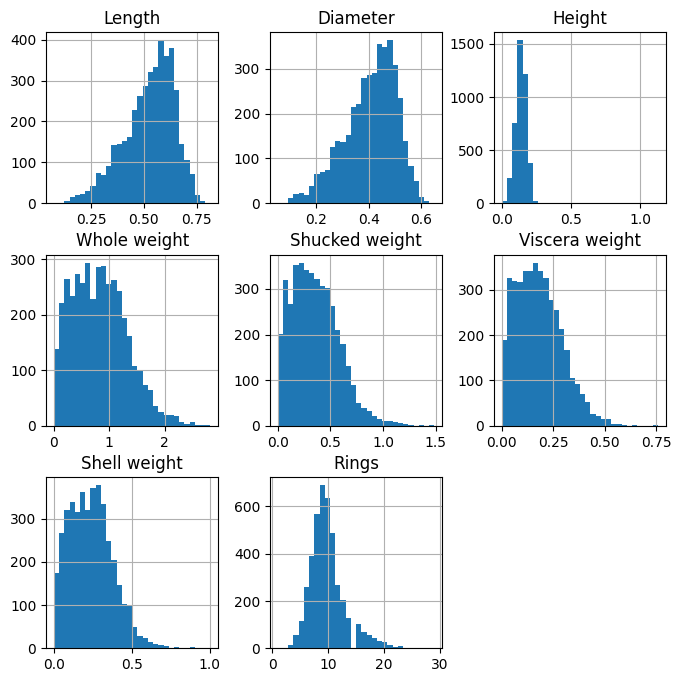

In [11]:
df.hist(bins=30, figsize=(8,8));

In [12]:
df.fillna({
    'Diameter': df['Diameter'].median(),
    'Whole weight': df['Whole weight'].median(),
    'Shell weight': df['Shell weight'].median()
}, inplace=True)

In [13]:
df.isnull().mean().sum()

0.0

Теперь пропущенных значений нет

## Однофакторный анализ

In [14]:
df['Height'][df['Height']==0]

,Height
1257,0.0
3996,0.0


Аномальных данных мало, в таком случае просто удалим эти строчки

In [15]:
df = df[df['Height'] > 0]

In [16]:
len(df['Height'][df['Height']==0])

0

In [17]:
df.describe(include='object')

,Sex
count,4175
unique,4
top,M
freq,1447


In [18]:
df['Sex'].unique()

array(['M', 'F', 'I', 'f'], dtype=object)

Допущена опечатка в данных, вместо `f` должно быть `F`

In [19]:
print(f"Число f: {len(df['Sex'][df['Sex']=='f'])}")

Число f: 195


In [20]:
df['Sex'] = df['Sex'].replace('f', 'F')

In [21]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


Данные подготовлены, устранены аномальные значения высоты аболона, опечатки в категориальном признаке и пропущенные значения в датасете

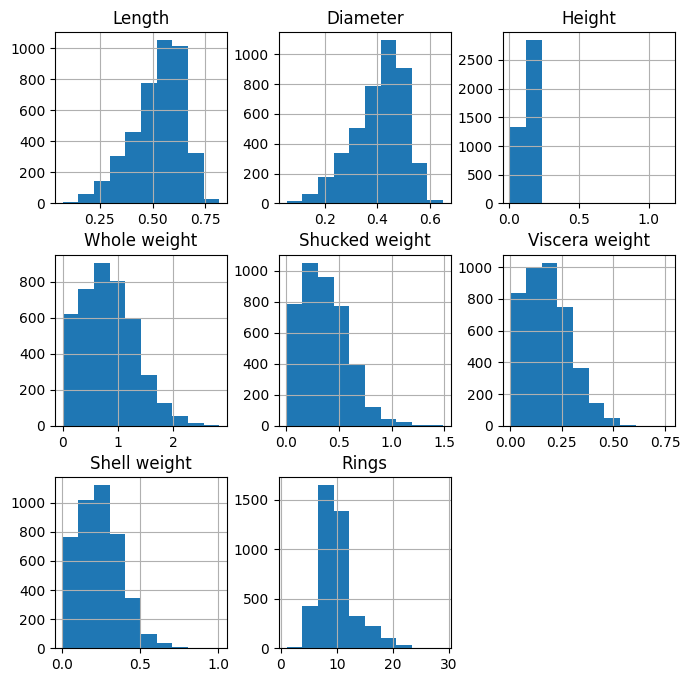

In [23]:
df.hist(bins=10, figsize=(8,8));

Распределения многих признаков отклоняются влево

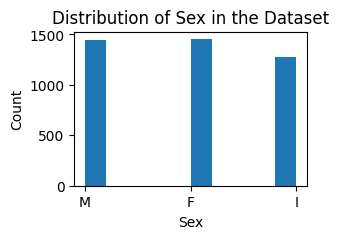

In [24]:
plt.figure(figsize=(3,2))
plt.hist(df.Sex)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in the Dataset')
plt.show()

Распределение категориального признака почти равномерное

Сколько весит самый тяжелый аболон?А легкий?

In [25]:
df['Whole weight'].min(), df['Whole weight'].max()

(0.002, 2.8255)

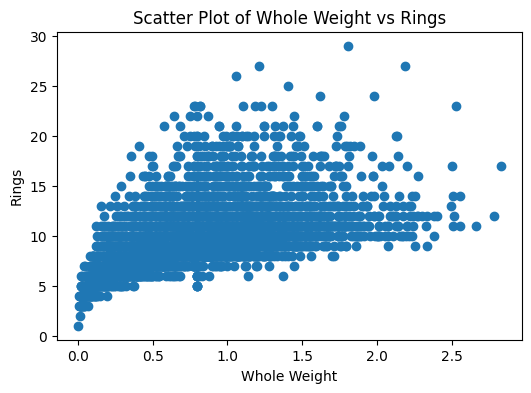

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(df['Whole weight'], df['Rings'])
plt.xlabel('Whole Weight')
plt.ylabel('Rings')
plt.title('Scatter Plot of Whole Weight vs Rings')
plt.show()

Зависимость Числа колец от полного веса аболона напоминает график функции корень из x

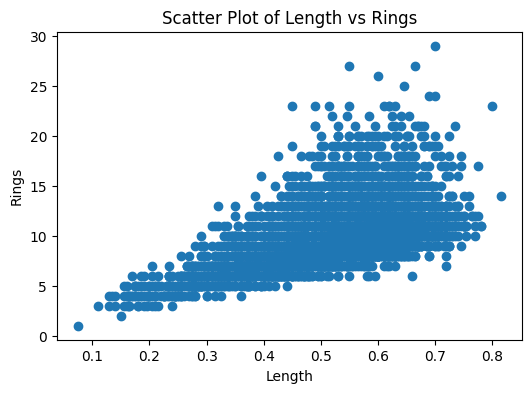

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(df['Length'], df['Rings'])
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title('Scatter Plot of Length vs Rings')
plt.show()

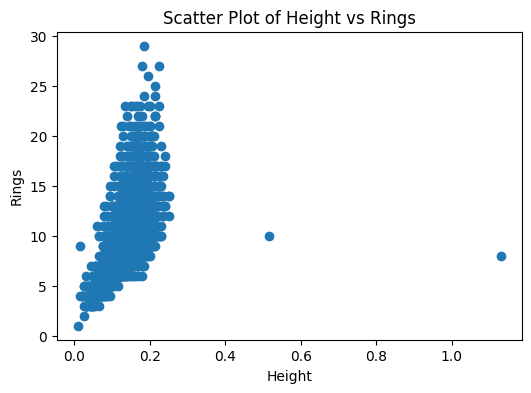

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(df['Height'], df['Rings'])
plt.xlabel('Height')
plt.ylabel('Rings')
plt.title('Scatter Plot of Height vs Rings')
plt.show()

Можно отметить разную похожую на линейную связь числа колец и длины, высоты аболона

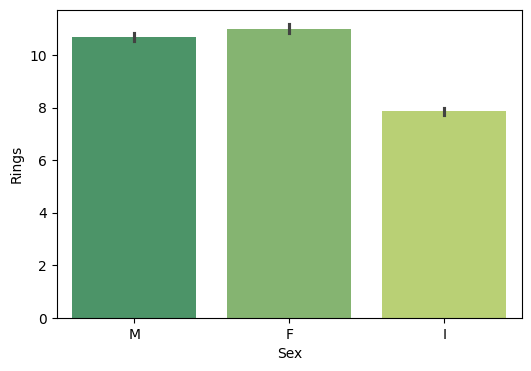

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Rings', data=df, hue='Sex', palette='summer');

Посчитаем среднее и медианное число колец для каждого пола, а так же вес

In [30]:
df.groupby('Sex').agg(
    Whole_weight_Mean=('Whole weight', 'mean'),
    Whole_weight_Median=('Whole weight', 'median'),
    HeightMean=('Height', 'mean'),
    HeightMedian=('Height', 'median'),
    RingsMean=('Rings', 'mean'),
    RingsMedian=('Rings', 'median')
)

,Whole_weight_Mean,Whole_weight_Median,HeightMean,HeightMedian,RingsMean,RingsMedian
Sex,,,,,,
F,1.017649,0.99475,0.155959,0.155,11.001376,10.0
I,0.438378,0.39100,0.108100,0.110,7.873626,8.0
M,0.977255,0.95500,0.150847,0.150,10.678645,10.0


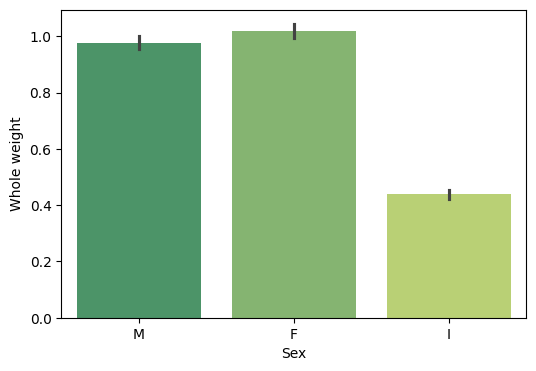

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Whole weight', data=df, hue='Sex', palette='summer');

Число колец у аболона сильно зависит от его веса и здесь прослеживается аналогичное распределение

## Взаимозависимость в данных

<Axes: >

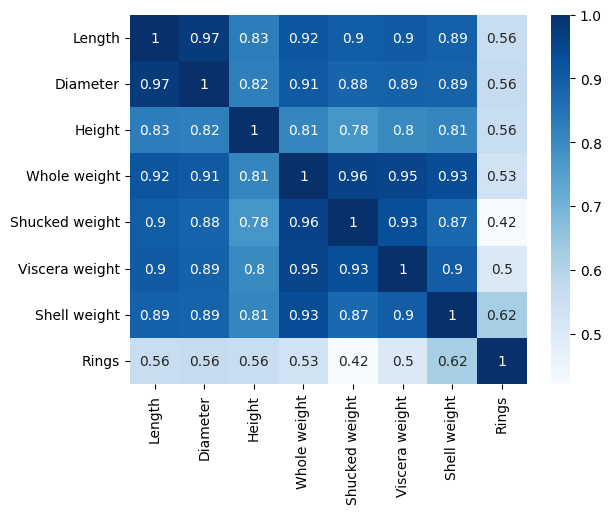

In [32]:
# Корреляция Пирсона
corr = df.corr(numeric_only=True) # матрица корреляций
sns.heatmap(corr, cmap="Blues", annot=True)

В первой матрице использован метод корреляции Пирсона. Этот метод измеряет линейную зависимость между переменными. Большинство коэффициентов довольно высокие, указывая на сильную линейную зависимость между переменными, особенно между длиной и диаметром (0.97), а также весами, например, весом мяса (Shucked weight) и весом целого объекта (Whole weight).

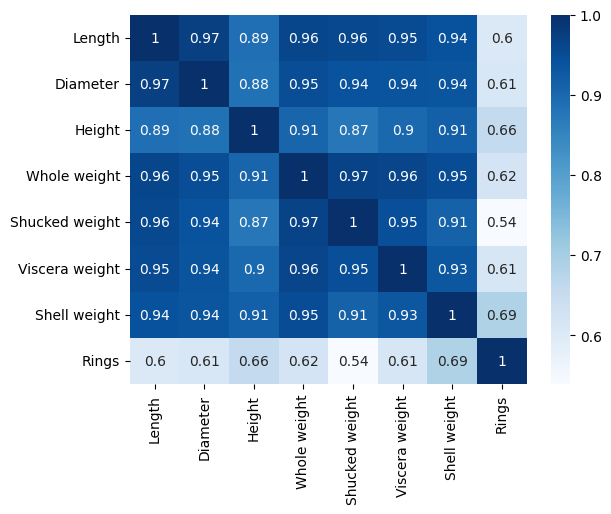

In [33]:
# Корреляция Спирмена
corr_spearman = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corr_spearman, cmap="Blues", annot=True);

Во второй матрице используется корреляция Спирмена. Этот метод лучше отражает монотонную зависимость. Здесь коэффициенты также высоки, хотя некоторые отличаются от Пирсона, что говорит о том, что зависимости между некоторыми переменными могут быть нелинейными, но монотонными.

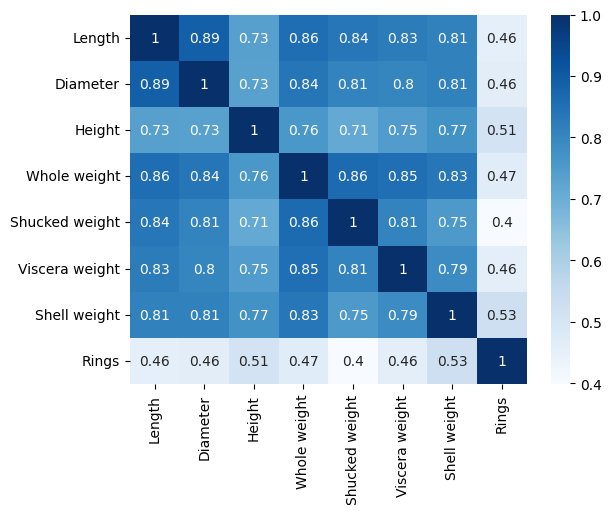

In [34]:
# Корреляция Кендалла
corr_kendall = df.corr(method='kendall', numeric_only=True)
sns.heatmap(corr_kendall, cmap="Blues", annot=True);

В третьей матрице корреляция Кендалла. Значения ниже, чем в Пирсоне и Спирмене, что может свидетельствовать о меньшей степени согласованности рангов, хотя основные зависимости остаются видимыми.

Число столбцов коррелирует с всеми признаками, больше всего коррелирует с высушенной массой раковины.
Высокие значения коэффициентов Пирсона и Спирмена говорят о наличии линейной и монотонной зависимости между большинством переменных, что может свидетельствовать о возможной взаимосвязанности характеристик объекта, таких как размеры и веса.
Низкие значения в методе Кендалла относительно методов Пирсона и Спирмена указывают на меньшую согласованность по рангам, что может значить, что некоторые зависимости не являются строгими и могут колебаться в зависимости от условий.

Статистикy $\chi^2$ посчитать не сможем, так как у нас только один категориальный признак. Попробуем посчитать параметр ANOVA.

In [35]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


Все параметры сильно коррелируются с целевой переменной, большую корреляцию можно отметить между массой аболона после высушивания и числом колец. Категориальный признак коррелирует со всеми числовыми признаками.

## Анализ распределения столбцов (целевой переменной)

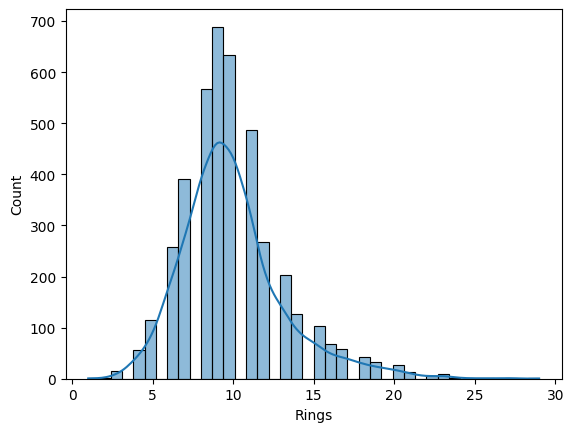

In [36]:
sns.histplot(data = df['Rings'], bins=40, kde = True);

Распределение целевого признака похоже на нормальное с отклонением влево. С большим числом колец предсказания будут менее точными ввиду меньшего количества данных для них

# ml_abalone

In [37]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [38]:
df['Age'] = df['Rings'] + 1.5

In [39]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [40]:
x_numerical_columns = df.select_dtypes(include=['number']).columns.to_list()
x_numerical_columns.remove('Rings')
x_numerical_columns.remove('Age')
x_numerical_columns

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [41]:
x = df[x_numerical_columns]
y = df['Age']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_reg_rmse = root_mean_squared_error(y_test, y_pred)
lin_reg_rmse

2.2656674452807457

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
pred_knn = knn_reg.predict(X_test)
knn_reg_rmse = root_mean_squared_error(y_test, pred_knn)
knn_reg_rmse

2.2699604195918064

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)
rf_reg_rmse = root_mean_squared_error(y_test, pred_rf)
rf_reg_rmse

2.187230158507221

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X_train, y_train)
pred_gbr = gbr_reg.predict(X_test)
gbr_reg_rmse = root_mean_squared_error(y_test, pred_gbr)
gbr_reg_rmse

2.1918891596105667

GradientBoostingRegressor показал наилучший результат, что указывает на его способность эффективно справляться с нелинейными зависимостями и получать точные предсказания.
RandomForestRegressor также показал хороший результат, что делает его достойной альтернативой, особенно когда важна интерпретируемость модели.
LinearRegression и KNeighborsRegressor показали более высокие значения ошибки, что говорит о меньшей точности в данной задаче.


In [47]:
from sklearn.model_selection import cross_val_score

cross_val_score_lin_reg = cross_val_score(lin_reg, x, y, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1).mean()
cross_val_score_knn_reg = cross_val_score(knn_reg, x, y, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1).mean()
cross_val_score_rf_reg = cross_val_score(rf_reg, x, y, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1).mean()
cross_val_score_gbr_reg = cross_val_score(gbr_reg, x, y, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1).mean()

print(f' nb:{cross_val_score_lin_reg * (-1)}\n \
knn: {cross_val_score_knn_reg * (-1)}\n \
lg: {cross_val_score_rf_reg * (-1)}\n \
rfc: {cross_val_score_gbr_reg * (-1)}')

 nb:2.355269285236769
 knn: 2.29211390464929
 lg: 2.2263690788907953
 rfc: 2.2182977082358


In [48]:
from sklearn.model_selection import GridSearchCV

knn_reg = KNeighborsRegressor()
params_knn = {'n_neighbors': range(1, 20), 'weights': ['uniform', 'distance']}

gs_knn = GridSearchCV(knn_reg, params_knn, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
gs_knn.fit(X_train, y_train)

print(gs_knn.best_params_)
knn_gs_rmse = -gs_knn.best_score_
knn_reg_rmse, knn_gs_rmse

Fitting 3 folds for each of 38 candidates, totalling 114 fits
{'n_neighbors': 19, 'weights': 'distance'}


(2.2699604195918064, 2.184380959005954)

In [49]:
rf_reg = RandomForestRegressor()
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

gs_rf = GridSearchCV(rf_reg, params_rf, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
gs_rf.fit(X_train, y_train)

print(gs_rf.best_params_)
rf_gs_rmse = -gs_rf.best_score_
rf_reg_rmse, rf_gs_rmse

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


(2.187230158507221, 2.1886424728798812)

In [50]:
gbr_reg = GradientBoostingRegressor()
params_gbr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gs_gbr = GridSearchCV(gbr_reg, params_gbr, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
gs_gbr.fit(X_train, y_train)

print(gs_gbr.best_params_)
gbr_gs_rmse = -gs_gbr.best_score_
gbr_reg_rmse, gbr_gs_rmse

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


(2.1918891596105667, 2.197994842801959)

In [51]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [52]:
x_full = df.drop(['Rings', 'Age'], axis=1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(x_full, y, test_size=0.25, random_state=42)

In [53]:
X_train_full.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64


In [54]:
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# from sklearn.compose import ColumnTransformer

# categorical = ['Sex']
# numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# ct = ColumnTransformer([
#     ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)
# ], remainder='passthrough')

# X_train_transformed = ct.fit_transform(X_train_full)
# X_test_transformed = ct.transform(X_test_full)

# new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
# new_features.extend(numeric_features)

# new_features

# X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
# X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

In [55]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_sex = encoder.fit_transform(X_train_full[['Sex']])

encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['Sex']), index=X_train_full.index)

X_train_full_encoded = X_train_full.drop('Sex', axis=1)
X_train_full_encoded = pd.concat([X_train_full_encoded, encoded_sex_df], axis=1)

encoded_sex_test = encoder.transform(X_test_full[['Sex']])
encoded_sex_test_df = pd.DataFrame(encoded_sex_test, columns=encoder.get_feature_names_out(['Sex']), index=X_test_full.index)

X_test_full_encoded = X_test_full.drop('Sex', axis=1)
X_test_full_encoded = pd.concat([X_test_full_encoded, encoded_sex_test_df], axis=1)

In [56]:
X_train_full_encoded.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M
2666,0.580,0.455,0.130,0.8520,0.4100,0.1725,0.2250,0.0,1.0
4086,0.590,0.450,0.155,0.8740,0.3690,0.2135,0.2400,0.0,1.0
2551,0.295,0.220,0.070,0.1260,0.0515,0.0275,0.0350,1.0,0.0
1804,0.620,0.470,0.145,1.0865,0.5110,0.2715,0.2565,0.0,1.0
247,0.360,0.275,0.085,0.1975,0.0745,0.0415,0.0700,0.0,0.0


In [57]:
knn_reg = KNeighborsRegressor()

gs_knn = GridSearchCV(knn_reg, params_knn, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
gs_knn.fit(X_train_full_encoded, y_train_full)

print(gs_knn.best_params_)
knn_gs_rmse_new = -gs_knn.best_score_
knn_gs_rmse, knn_gs_rmse_new

Fitting 3 folds for each of 38 candidates, totalling 114 fits
{'n_neighbors': 19, 'weights': 'distance'}


(2.184380959005954, 2.2415248769507525)

In [58]:
rf_reg = RandomForestRegressor()
gs_rf = GridSearchCV(rf_reg, params_rf, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
gs_rf.fit(X_train_full_encoded, y_train_full)

print(gs_rf.best_params_)
rf_gs_rmse_new = -gs_rf.best_score_
rf_gs_rmse, rf_gs_rmse_new

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


(2.1886424728798812, 2.1698614061745367)

In [59]:
gbr_reg = GradientBoostingRegressor()
gs_gbr = GridSearchCV(gbr_reg, params_gbr, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
gs_gbr.fit(X_train_full_encoded, y_train_full)

print(gs_gbr.best_params_)
gbr_gs_rmse_new = -gs_gbr.best_score_
gbr_gs_rmse, gbr_gs_rmse_new

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


(2.197994842801959, 2.1761824944187698)

Для данной задачи оптимальным выбором является RandomForestRegressor, так как он продемонстрировал лучшее качество предсказания (наименьший RMSE) после подбора параметров.

In [60]:
!pip install explainerdashboard -q \
# eli5 -q \
shap -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00


In [61]:
# import eli5
import shap
from explainerdashboard import ClassifierExplainer, RegressionExplainer, ExplainerDashboard

In [62]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [63]:
explainer = RegressionExplainer(gs_rf.best_estimator_, X_test_full_encoded, y_test_full)

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [71]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [73]:
db.run(port='8070')

Starting ExplainerDashboard on http://172.28.0.12:8070
You can terminate the dashboard with ExplainerDashboard.terminate(8070)
Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

По ExplainerDashboard db можно сделать вывод, что для прогноза три наиболее важных признака: масса раковины после высушивания, масса только мяса после извлечения из раковины и высота раковины. То есть параметры, связанные с весом, больше информации несут в себе для предсказания числа колец на ракушке.